<a href="https://colab.research.google.com/github/velish-qubadov/Deep-Learning/blob/main/Computer-Vision(Pizza-Stake-Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


--2025-07-27 11:54:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 172.217.194.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.1MB/s    in 6.6s    

2025-07-27 11:55:07 (15.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.


In [6]:
for i in os.walk('pizza_steak'):
  print(i)

('pizza_steak', ['test', 'train'], [])
('pizza_steak/test', ['steak', 'pizza'], [])
('pizza_steak/test/steak', [], ['1848936.jpg', '970916.jpg', '504349.jpg', '3576324.jpg', '835871.jpg', '1879697.jpg', '550687.jpg', '3905395.jpg', '730464.jpg', '2716791.jpg', '653303.jpg', '1012080.jpg', '2720938.jpg', '13023.jpg', '1653815.jpg', '39461.jpg', '429304.jpg', '1094883.jpg', '1872368.jpg', '2138503.jpg', '2576310.jpg', '3138001.jpg', '290406.jpg', '562855.jpg', '27415.jpg', '391144.jpg', '746921.jpg', '1902895.jpg', '904856.jpg', '481867.jpg', '766575.jpg', '3479599.jpg', '3343970.jpg', '2600656.jpg', '221604.jpg', '690477.jpg', '2193535.jpg', '3662612.jpg', '2512387.jpg', '2981911.jpg', '1956040.jpg', '3901703.jpg', '2372048.jpg', '66858.jpg', '902211.jpg', '2229090.jpg', '1882831.jpg', '918793.jpg', '1166047.jpg', '673127.jpg', '2198931.jpg', '1868005.jpg', '1718949.jpg', '958704.jpg', '526186.jpg', '1983405.jpg', '354513.jpg', '1499273.jpg', '1319758.jpg', '2802460.jpg', '148595.jpg', 

In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [8]:
os.listdir('pizza_steak/train')

['steak', 'pizza']

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [10]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class # 'pizza_steak/test/pizza'
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (384, 512, 3)


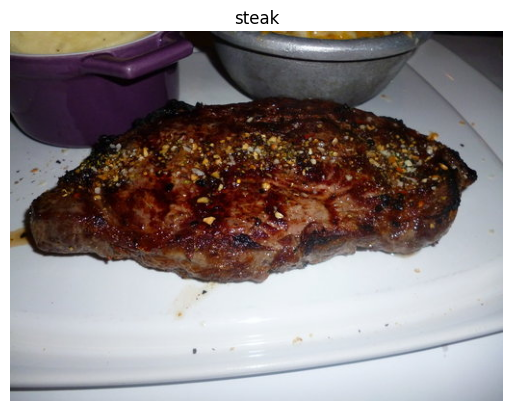

In [12]:
img = view_random_image(target_dir='pizza_steak/train/',
                  target_class= 'steak')

In [16]:
img/255

array([[[0.59607843, 0.54901961, 0.36078431],
        [0.59607843, 0.54901961, 0.36078431],
        [0.6       , 0.54509804, 0.35294118],
        ...,
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941]],

       [[0.59607843, 0.54901961, 0.36078431],
        [0.6       , 0.55294118, 0.36470588],
        [0.60392157, 0.55686275, 0.36078431],
        ...,
        [0.00784314, 0.        , 0.01960784],
        [0.00784314, 0.        , 0.02352941],
        [0.00784314, 0.        , 0.02352941]],

       [[0.59215686, 0.54901961, 0.36862745],
        [0.6       , 0.55686275, 0.37647059],
        [0.61176471, 0.56470588, 0.37647059],
        ...,
        [0.01176471, 0.00392157, 0.02352941],
        [0.01176471, 0.00392157, 0.02352941],
        [0.01176471, 0.00392157, 0.02352941]],

       ...,

       [[0.56862745, 0.59215686, 0.63921569],
        [0.57254902, 0.59607843, 0.64313725],
        [0.57254902, 0

# Fitting Model


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)
train_dir= '/content/pizza_steak/train'
valid_dir= '/content/pizza_steak/test'

Conv2D (Convolutional 2D layer) — kompüterə şəkilləri “görməyi” öyrədən qatdır. Bu qat, şəkillərdəki xüsusiyyətləri (məsələn, kənar, dairə, nöqtə) avtomatik çıxarır.

🧱 Texniki izah:
Conv2D qatında:

Filter (və ya kernel) adlanan kiçik bir matrisa var (məsələn, 3x3),

Bu filter giriş şəkil üzərində gəzərək dot-product (çoxaltma və toplama) edir,

Nəticədə yeni şəkil (feature map) yaranır – burada şəkilin əsas xüsusiyyətləri saxlanılır.




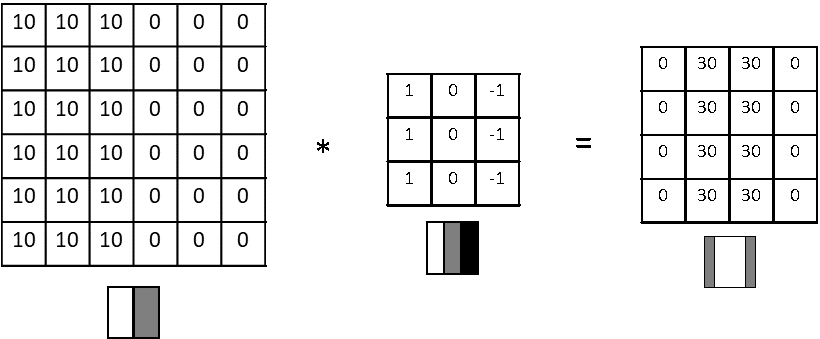

MaxPooling2D  Input (giriş) üzərində kiçik pəncərələrlə (window) gəzir, hər pəncərədə ən böyük (max) dəyəri seçir və bu dəyərlərlə yeni bir "kiçik şəkil" (downsampled image) yaradır.

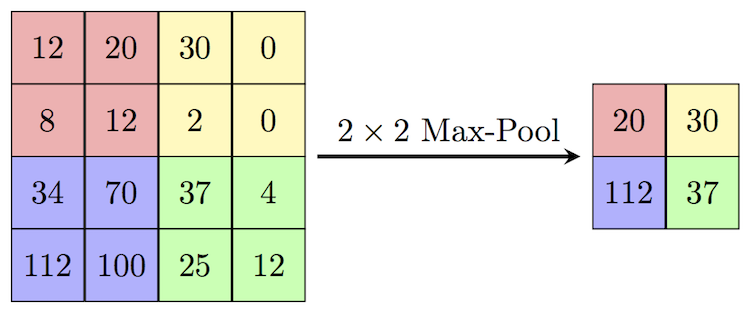


In [ ]:

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed=42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='binary_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

In [ ]:
history = model_1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - accuracy: 0.5605 - loss: 0.7230 - val_accuracy: 0.8180 - val_loss: 0.4296
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.7710 - loss: 0.4868 - val_accuracy: 0.8400 - val_loss: 0.3841
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.8122 - loss: 0.4238 - val_accuracy: 0.8580 - val_loss: 0.4034
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8108 - loss: 0.4150 - val_accuracy: 0.8280 - val_loss: 0.3777
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.8401 - loss: 0.3740 - val_accuracy: 0.8020 - val_loss: 0.3892


In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model_2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_2 = model_2.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.5239 - loss: 3.0179 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4926 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5089 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.4963 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.5064 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.5915 - loss: 7.9948 - val_accuracy: 0.7080 - val_loss: 0.9542
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.6985 - loss: 1.0642 - val_accuracy: 0.7980 - val_loss: 0.4959
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7454 - loss: 0.8785 - val_accuracy: 0.8000 - val_loss: 0.7343
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8033 - loss: 0.6117 - val_accuracy: 0.6980 - val_loss: 0.8005
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7695 - loss: 0.6058 - val_accuracy: 0.7320 - val_loss: 0.6993


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,189,305 (172.38 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,126,204 (114.92 MB)

In [ ]:
len(train_data)

47

Image shape: (512, 382, 3)
Image shape: (341, 512, 3)


array([[[ 78,  76,  64],
        [ 86,  84,  72],
        [ 85,  82,  73],
        ...,
        [140, 146, 144],
        [138, 147, 144],
        [139, 148, 145]],

       [[ 89,  87,  75],
        [ 96,  94,  82],
        [ 93,  90,  81],
        ...,
        [142, 148, 146],
        [140, 149, 146],
        [140, 149, 146]],

       [[ 96,  96,  84],
        [103, 103,  91],
        [101,  98,  89],
        ...,
        [144, 150, 146],
        [142, 151, 146],
        [142, 151, 146]],

       ...,

       [[214, 175, 146],
        [217, 178, 149],
        [218, 178, 152],
        ...,
        [ 10,  22,  12],
        [  9,  20,  12],
        [  9,  20,  12]],

       [[216, 177, 148],
        [217, 178, 149],
        [216, 176, 150],
        ...,
        [ 10,  22,  12],
        [  9,  20,  12],
        [  9,  20,  12]],

       [[221, 182, 153],
        [219, 180, 151],
        [216, 176, 150],
        ...,
        [ 11,  23,  13],
        [ 11,  22,  14],
        [ 11,  22,  14]]], dtype=uint8)
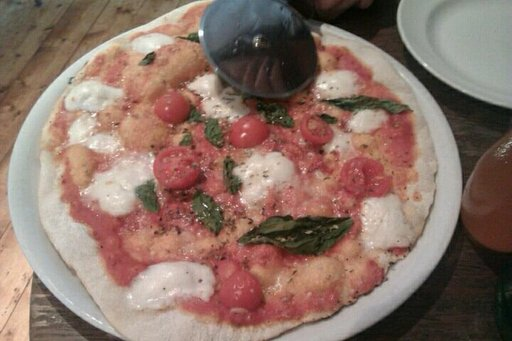

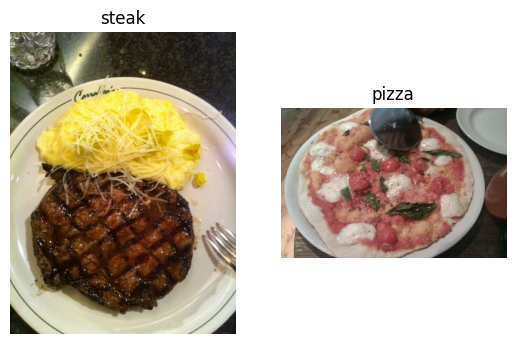

In [ ]:

plt.figure()
plt.subplot(1, 2, 1)
view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1./ 255)
test_datagen = ImageDataGenerator(1./ 255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode='binary')

test_data = test_datagen.flow_from_directory(directory=valid_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels= next(train_data)

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
    ])

In [ ]:
optimizer=Adam(learning_rate=1e-3)
model_4.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.5217 - loss: 1.2363 - val_accuracy: 0.4940 - val_loss: 0.6930
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.6062 - loss: 0.6876 - val_accuracy: 0.5020 - val_loss: 0.6926
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6529 - loss: 0.6333 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 222ms/step - accuracy: 0.6780 - loss: 0.5753 - val_accuracy: 0.5000 - val_loss: 0.6948
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.7247 - loss: 0.5360 - val_accuracy: 0.5000 - val_loss: 0.6989


In [ ]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7146 - loss: 95.3315


[85.70245361328125, 0.734000027179718]

In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6876 - loss: 0.5831


[0.6002489328384399, 0.6840000152587891]

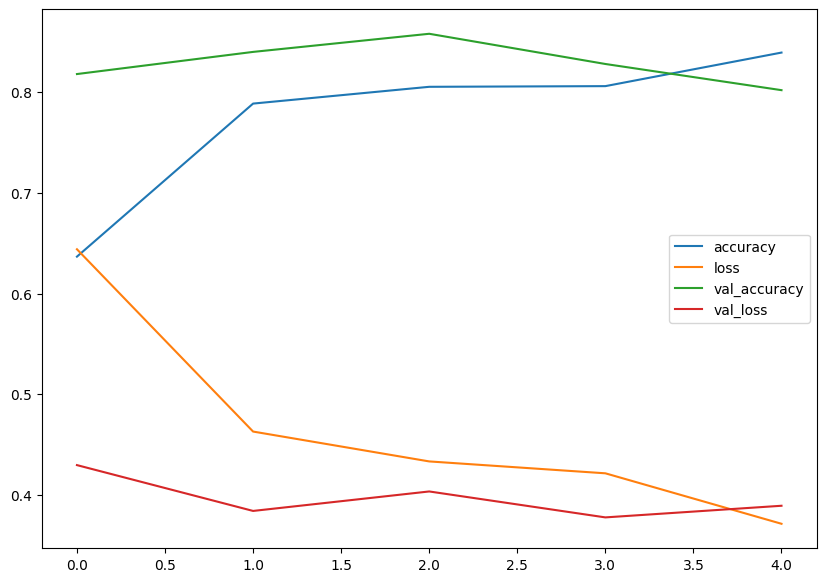

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 7));

In [ ]:
history_4.history

{'accuracy': [0.5519999861717224,
  0.5986666679382324,
  0.653333306312561,
  0.7039999961853027,
  0.7459999918937683],
 'loss': [0.9420947432518005,
  0.6825168132781982,
  0.6239839792251587,
  0.5585379004478455,
  0.5153682231903076],
 'val_accuracy': [0.49399998784065247, 0.5019999742507935, 0.5, 0.5, 0.5],
 'val_loss': [0.6930336356163025,
  0.6925795674324036,
  0.6927348375320435,
  0.6948373317718506,
  0.6988949775695801]}

In [25]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel("Epochs")
  plt.legend()

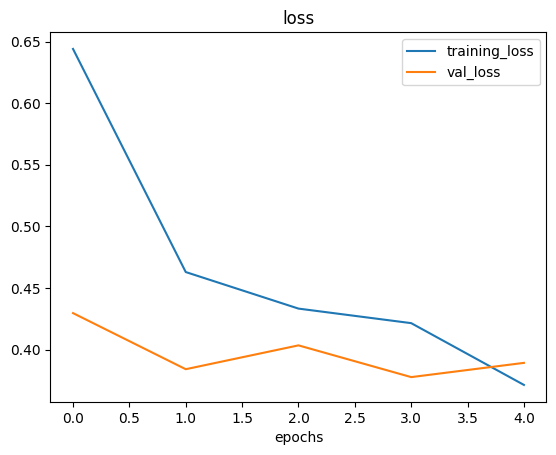

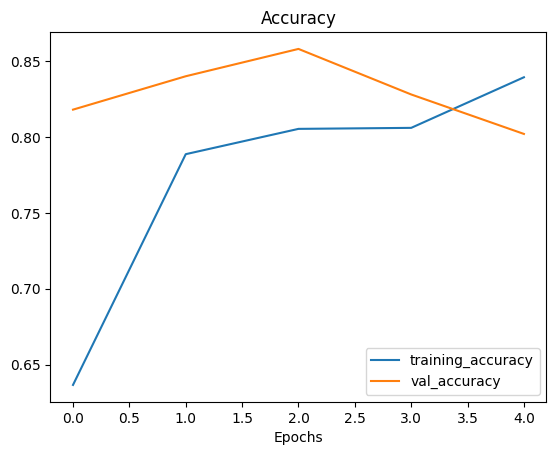

In [ ]:
plot_loss_curves(history)

# Data Augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             shear_range =0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True,
                                             vertical_flip=True)
# Normal Dataset
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [67]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   batch_size = 32,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle = False)

print('Non-Augmented train data: ')
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               shuffle=False)

IMG_SIZE = (224, 224)
print("Non-Augmented test data: ")
test_data = test_datagen.flow_from_directory(directory = valid_dir,
                                             batch_size = 32,
                                             target_size = IMG_SIZE,
                                             class_mode = 'binary')

Train data augmented: 
Found 7500 images belonging to 10 classes.
Non-Augmented train data: 
Found 7500 images belonging to 10 classes.
Non-Augmented test data: 
Found 500 images belonging to 2 classes.


In [19]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

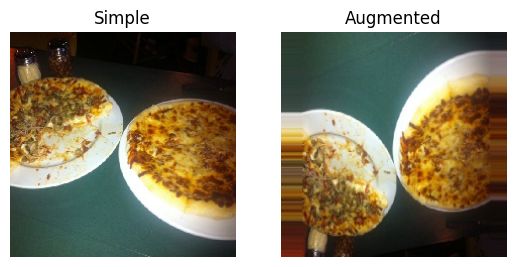

In [20]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('Off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title('Augmented')
plt.axis("Off")


In [21]:

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_5.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [23]:
history_5 = model_5.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 515ms/step - accuracy: 0.6573 - loss: 4.4895 - val_accuracy: 0.6200 - val_loss: 0.6437
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 428ms/step - accuracy: 0.6080 - loss: 0.7193 - val_accuracy: 0.5720 - val_loss: 0.7267
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 454ms/step - accuracy: 0.6373 - loss: 0.6461 - val_accuracy: 0.5160 - val_loss: 0.7246
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step - accuracy: 0.5380 - loss: 0.7377 - val_accuracy: 0.5340 - val_loss: 0.7120
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 419ms/step - accuracy: 0.6404 - loss: 0.6169 - val_accuracy: 0.7460 - val_loss: 0.5345


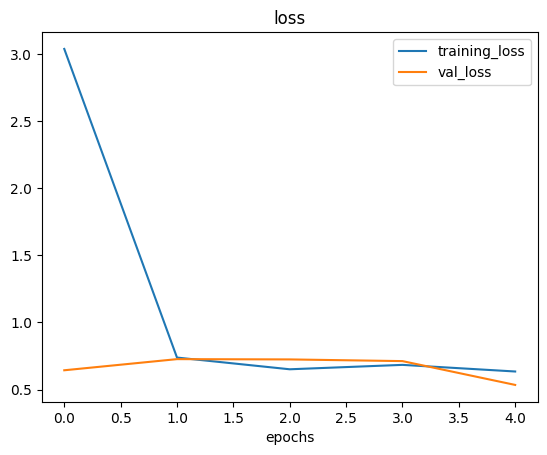

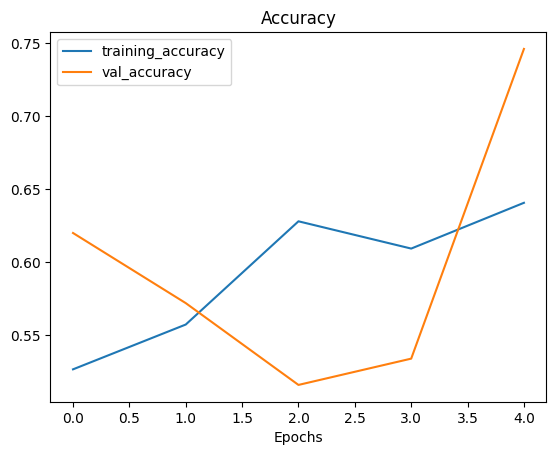

In [26]:
plot_loss_curves(history_5)


Now let's Shuffle data


In [27]:
print('Augmented and Shuffled train data')
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                             batch_size = 32,
                                                                             target_size = IMG_SIZE,
                                                                             class_mode = 'binary')

Augmented and Shuffled train data
Found 1500 images belonging to 2 classes.


In [28]:

model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3)
model_6.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [30]:
history_6 = model_6.fit(train_data_augmented_and_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented_and_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 541ms/step - accuracy: 0.5747 - loss: 0.6966 - val_accuracy: 0.6220 - val_loss: 0.6565
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 405ms/step - accuracy: 0.6875 - loss: 0.5907 - val_accuracy: 0.7740 - val_loss: 0.4781
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.7257 - loss: 0.5552 - val_accuracy: 0.8120 - val_loss: 0.4369
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.7284 - loss: 0.5598 - val_accuracy: 0.7860 - val_loss: 0.4615
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.7624 - loss: 0.5190 - val_accuracy: 0.8200 - val_loss: 0.4132


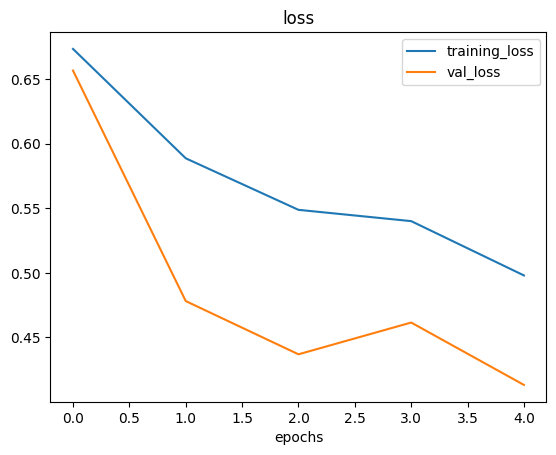

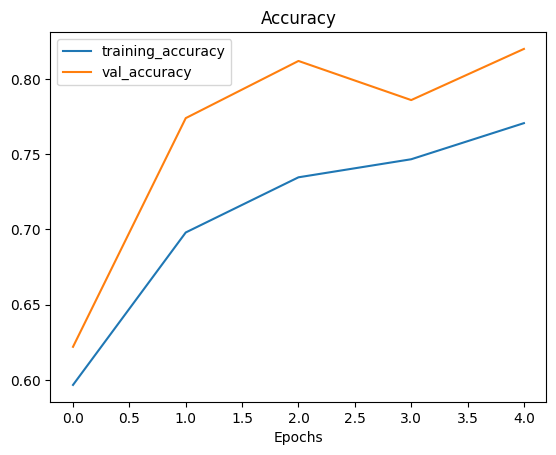

In [31]:
plot_loss_curves(history_6)

In [32]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2025-07-27 12:02:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2025-07-27 12:02:42 (179 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



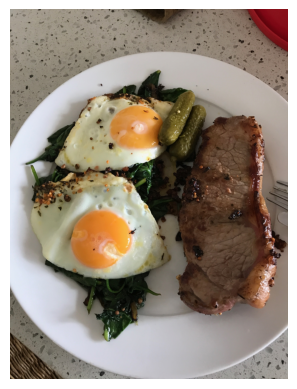

In [33]:
plt.imshow(steak)
plt.axis(False)
plt.show()

In [34]:
def load_and_prep_image(filename, img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img, size=[img_shape,img_shape])
  img=img/255.
  return img

In [35]:
(load_and_prep_image('/content/03-steak.jpeg').shape)

TensorShape([224, 224, 3])

In [36]:
steak=load_and_prep_image('03-steak.jpeg')
pred= model_6.predict(tf.expand_dims(steak, axis=0)).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


In [37]:
pred

array([[1.]], dtype=float32)

In [38]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [39]:
pred_class= class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [63]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


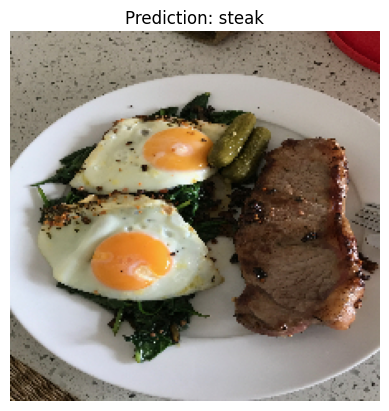

In [65]:
pred_and_plot(model_6, '03-steak.jpeg')

In [42]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')

--2025-07-27 12:03:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2025-07-27 12:03:03 (215 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


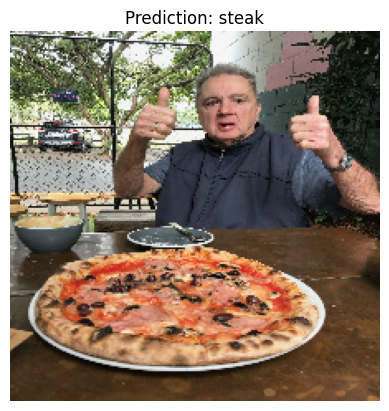

In [66]:
pred_and_plot(model_6, '/content/03-pizza-dad.jpeg')